In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean.csv")
dataframe

,CLASS,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,Who,Where,When,What,Why,How,Additional information
0,entailment,28.645093,1.631951,9.032564,0.000000,6.144412,0.127508,0.000000,0.00000,4.677207,...,0,0,0,0.696783,0.076060,1.0,0.505262,1.0,1.0,1.000000
1,entailment,26.671300,3.984223,4.437697,0.000000,2.492923,8.615627,0.000000,0.00000,9.887845,...,0,0,0,0.762582,1.000000,1.0,0.944161,1.0,1.0,0.699488
2,contradiction,14.880619,1.824592,3.687874,0.000000,5.383794,1.300978,3.665578,0.00000,1.199861,...,0,0,0,0.881357,0.265408,1.0,0.360803,1.0,1.0,1.000000
3,contradiction,7.112267,0.000000,4.998954,0.000000,3.913144,0.000000,0.000000,0.00000,4.153236,...,0,0,0,0.153366,1.000000,1.0,0.358316,1.0,1.0,1.000000
4,neutral,14.623623,0.000000,1.083491,0.000000,1.657801,0.000000,0.000000,0.00000,3.077783,...,0,1,0,0.919903,0.715984,1.0,0.224679,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,entailment,22.531673,4.194771,1.396518,1.896350,0.000000,5.424360,1.283683,0.00000,3.104924,...,0,0,0,0.706643,0.210286,1.0,0.570392,1.0,1.0,1.000000
96,entailment,11.299096,0.000000,0.397504,0.000000,5.716955,0.000000,0.512868,0.00000,0.000000,...,0,0,0,0.894956,1.000000,1.0,0.830284,1.0,1.0,1.000000
97,contradiction,6.672148,0.000000,5.138863,0.000000,0.000000,0.000000,0.000000,0.00000,3.334945,...,0,0,0,0.072305,1.000000,1.0,0.086890,1.0,1.0,1.000000
98,contradiction,7.110450,0.000000,0.658881,0.000000,0.000000,0.000000,0.000000,0.00000,2.450452,...,0,0,0,0.655674,1.000000,1.0,0.357685,1.0,1.0,1.000000


In [14]:
X=dataframe.drop("CLASS",axis=1).values

In [15]:
y=np.array(dataframe.CLASS)

In [16]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier()


In [18]:

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

In [20]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.45


In [21]:
c=dataframe.columns

Profundidad del árbol: 8
Número de nodos terminales: 20


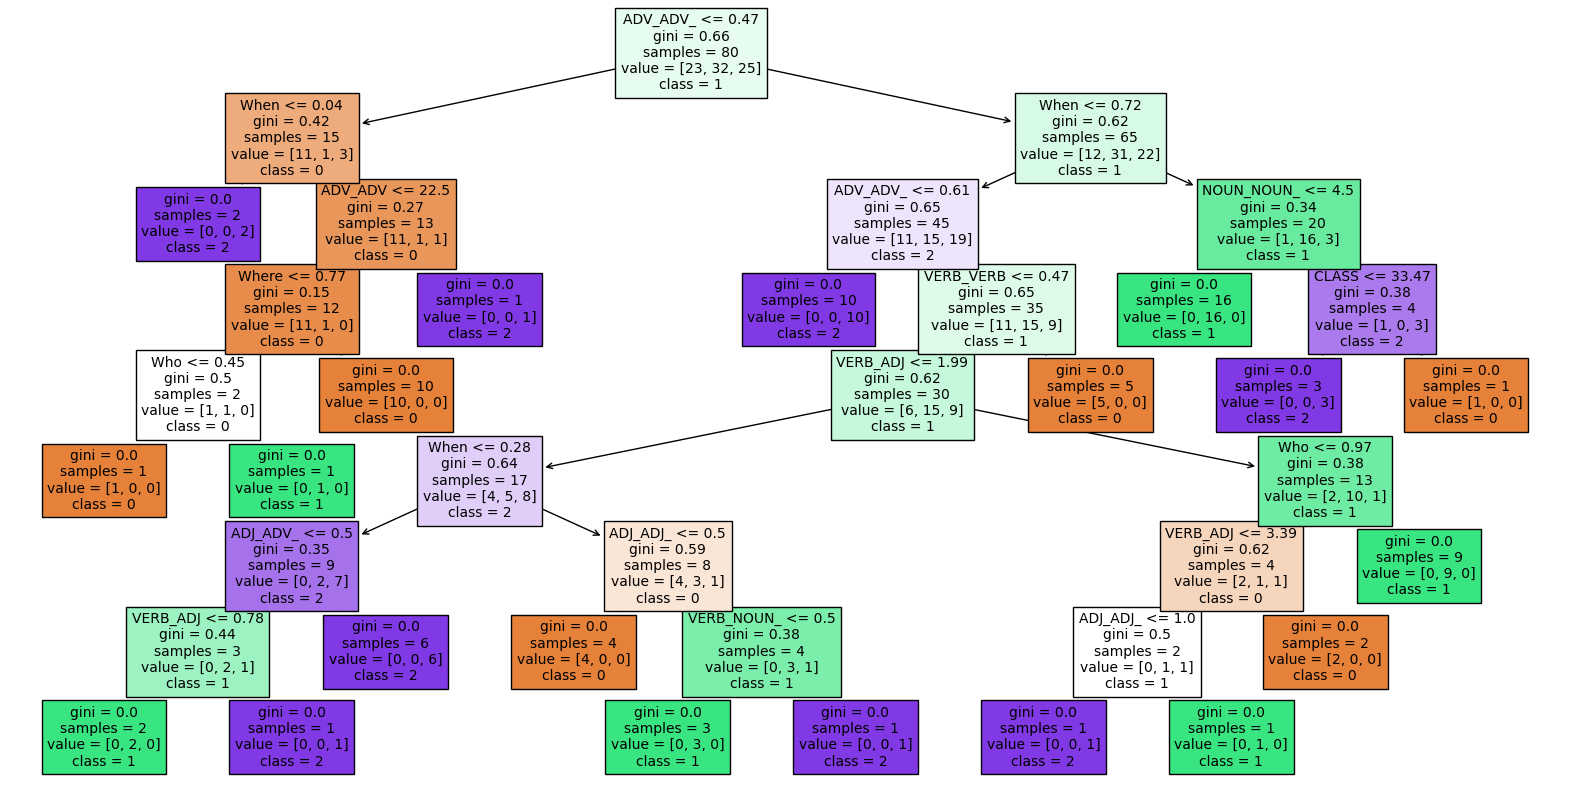

In [22]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = '012',
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )